# Imports

In [1]:
import importlib
import sys

import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["TORCH_NUM_THREADS"] = "1"

import torch

sys.path.insert(0, '..')
sys.path.insert(0, '../..')
sys.path.insert(0, '../../..')

# Data

### Load Data Files

In [2]:
# Path to your pickle file (saved with torch.save)
file_path_train = '../../../../../../ProbabilisticSuffixPredictionLab/risk_controlled_proactive_conformance_checking_dev/data/encoded_data/BPIC20/BPIC-20_all_normal_5_train.pkl'
# Load the dataset using torch.load
BPIC_20_train_dataset = torch.load(file_path_train, weights_only=False)
# Check the type of the loaded dataset
print(type(BPIC_20_train_dataset))

# Path to your pickle file (saved with torch.save)
file_path_val = '../../../../../../ProbabilisticSuffixPredictionLab/risk_controlled_proactive_conformance_checking_dev/data/encoded_data/BPIC20/BPIC-20_all_normal_5_val.pkl'
# Load the dataset using torch.load
BPIC_20_val_dataset = torch.load(file_path_val, weights_only=False)
# Check the type of the loaded dataset
print(type(BPIC_20_val_dataset))

<class 'event_log_loader.new_event_log_loader.EventLogDataset'>
<class 'event_log_loader.new_event_log_loader.EventLogDataset'>


### Train Data Insights

In [3]:
# BPIC 20 DD Dataset Categories, Features:

bpic_20_all_categories = BPIC_20_train_dataset.all_categories

bpic_20_all_categories_cat = bpic_20_all_categories[0]
print(bpic_20_all_categories_cat)

bpic_20_all_categories_num = bpic_20_all_categories[1]
print(bpic_20_all_categories_num)

for i, cat in enumerate(bpic_20_all_categories_cat):
     print(f"BPIC 20 (5) Categorical feature: {cat[0]}, Index position in categorical data list: {i}")
     print(f"BPIC 20 (5) Total Amount of Category labels: {cat[1]}")
print('\n')    
for i, num in enumerate(bpic_20_all_categories_num):
     print(f"BPIC 20 (5) Numerical feature: {num[0]}, Index position in categorical data list: {i}")
     print(f"BPIC 20 (5) Amount Category Lables: {num[1]}")

[('concept:name', 18, {'Declaration APPROVED by ADMINISTRATION': 1, 'Declaration APPROVED by BUDGET OWNER': 2, 'Declaration APPROVED by PRE_APPROVER': 3, 'Declaration FINAL_APPROVED by SUPERVISOR': 4, 'Declaration FOR_APPROVAL by ADMINISTRATION': 5, 'Declaration FOR_APPROVAL by SUPERVISOR': 6, 'Declaration REJECTED by ADMINISTRATION': 7, 'Declaration REJECTED by BUDGET OWNER': 8, 'Declaration REJECTED by EMPLOYEE': 9, 'Declaration REJECTED by MISSING': 10, 'Declaration REJECTED by PRE_APPROVER': 11, 'Declaration REJECTED by SUPERVISOR': 12, 'Declaration SAVED by EMPLOYEE': 13, 'Declaration SUBMITTED by EMPLOYEE': 14, 'EOS': 15, 'Payment Handled': 16, 'Request Payment': 17}), ('org:resource', 4, {'EOS': 1, 'STAFF MEMBER': 2, 'SYSTEM': 3}), ('org:role', 9, {'ADMINISTRATION': 1, 'BUDGET OWNER': 2, 'EMPLOYEE': 3, 'EOS': 4, 'MISSING': 5, 'PRE_APPROVER': 6, 'SUPERVISOR': 7, 'UNDEFINED': 8}), ('case:BudgetNumber', 3, {'EOS': 1, 'budget 86566': 2}), ('case:DeclarationNumber', 5526, {'EOS': 1, 

### Input Features for Encoder and Decoder

In [4]:
# Create lists with name of Encoder features (input) and decoder features (input & output)

# Encoder features:
enc_feat_cat = []
enc_feat_num = []
for cat in bpic_20_all_categories_cat:
    enc_feat_cat.append(cat[0])
for num in bpic_20_all_categories_num:
    enc_feat_num.append(num[0])
enc_feat = [enc_feat_cat, enc_feat_num]
print("Input features encoder: ", enc_feat)

"""
# Decoder features:
dec_feat_cat = enc_feat_cat
dec_feat_num = enc_feat_num
dec_feat = [dec_feat_cat, dec_feat_num]
print("Features decoder: ", dec_feat)
"""

# Decoder features:
dec_feat_cat = ['concept:name']
# dec_feat_num = ['case_elapsed_time', 'event_elapsed_time']
dec_feat_num = ['case_elapsed_time']
dec_feat = [dec_feat_cat, dec_feat_num]
print("Features decoder: ", dec_feat)

Input features encoder:  [['concept:name', 'org:resource', 'org:role', 'case:BudgetNumber', 'case:DeclarationNumber'], ['case_elapsed_time', 'event_elapsed_time', 'day_in_week', 'seconds_in_day', 'case:Amount']]
Features decoder:  [['concept:name'], ['case_elapsed_time']]


# Model

In [5]:
import model.dropout_uncertainty_enc_dec_LSTM.dropout_uncertainty_model
importlib.reload(model.dropout_uncertainty_enc_dec_LSTM.dropout_uncertainty_model)
from model.dropout_uncertainty_enc_dec_LSTM.dropout_uncertainty_model import DropoutUncertaintyEncoderDecoderLSTM

# Prediction decoder output sequence length (-1 of the min suffix length)
seq_len_pred = 4
# seq_len_pred = 2

# Size hidden layer
hidden_size = 128

# Number of cells
num_layers = 4

# Fixed Dropout probability 
dropout = 0.1

# Encoder Decoder model initialization
model = DropoutUncertaintyEncoderDecoderLSTM(data_set_categories=bpic_20_all_categories,
                                             enc_feat=enc_feat,
                                             dec_feat=dec_feat,
                                             seq_len_pred=seq_len_pred,
                                             hidden_size=hidden_size,
                                             num_layers=num_layers,
                                             dropout=dropout)

Data set categories:  ([('concept:name', 18, {'Declaration APPROVED by ADMINISTRATION': 1, 'Declaration APPROVED by BUDGET OWNER': 2, 'Declaration APPROVED by PRE_APPROVER': 3, 'Declaration FINAL_APPROVED by SUPERVISOR': 4, 'Declaration FOR_APPROVAL by ADMINISTRATION': 5, 'Declaration FOR_APPROVAL by SUPERVISOR': 6, 'Declaration REJECTED by ADMINISTRATION': 7, 'Declaration REJECTED by BUDGET OWNER': 8, 'Declaration REJECTED by EMPLOYEE': 9, 'Declaration REJECTED by MISSING': 10, 'Declaration REJECTED by PRE_APPROVER': 11, 'Declaration REJECTED by SUPERVISOR': 12, 'Declaration SAVED by EMPLOYEE': 13, 'Declaration SUBMITTED by EMPLOYEE': 14, 'EOS': 15, 'Payment Handled': 16, 'Request Payment': 17}), ('org:resource', 4, {'EOS': 1, 'STAFF MEMBER': 2, 'SYSTEM': 3}), ('org:role', 9, {'ADMINISTRATION': 1, 'BUDGET OWNER': 2, 'EMPLOYEE': 3, 'EOS': 4, 'MISSING': 5, 'PRE_APPROVER': 6, 'SUPERVISOR': 7, 'UNDEFINED': 8}), ('case:BudgetNumber', 3, {'EOS': 1, 'budget 86566': 2}), ('case:DeclarationNum

# Loss Object Creation

In [6]:
import loss.losses
importlib.reload(loss.losses)
from loss.losses import Loss

loss_obj = Loss()

# Training Configuration

In [7]:
import trainer.trainer
importlib.reload(trainer.trainer)
from trainer.trainer import Trainer
from torch.optim.lr_scheduler import ReduceLROnPlateau

from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter(comment="Full_BPIC20_grad_conf_check02_5")

# device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Start learning rate
learning_rate = 1e-5

# Optimizer and Scheduler
optimizer = torch.optim.AdamW(params=model.parameters(), lr=learning_rate, weight_decay=0)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, min_lr=1e-10)

# Epochs
num_epochs = 100

# Batch size
batch_size = 128

# lambda for L2 (weight, bias, dropout) regularization: According to formula: 1/2N
# regularization_term = 1.0/(2.0*batch_size)
regularization_term = 1e-4

# shuffle data
shuffle = True

# Teacher forcing: Smaller 0.5 more target events are used for next event prediction.
teacher_forcing_ratio = 0.75

optimize_values = {"regularization_term":regularization_term,
                   "optimizer":optimizer,
                   "scheduler": scheduler,
                   "epochs":num_epochs,
                   "mini_batches":batch_size,
                   "shuffle": shuffle,
                   "teacher_forcing_ratio":teacher_forcing_ratio}

suffix_data_split_value = seq_len_pred

# GradNorm parameter
use_gradnorm = True
gn_alpha = 1.5
gn_learning_rate = 1e-4

number_tasks = len(dec_feat[0]) + len(dec_feat[1])

gradNorm = {"use_gradnorm":use_gradnorm,
            "number_tasks": number_tasks,
            "gn_alpha":gn_alpha,
            "gn_learning_rate": gn_learning_rate}

trainer = Trainer(device=device,
                  model=model,
                  data_train=BPIC_20_train_dataset,
                  data_val=BPIC_20_val_dataset,
                  loss_obj=loss_obj,
                  log_normal_loss_num_feature= [],
                  optimize_values=optimize_values,
                  suffix_data_split_value=suffix_data_split_value,
                  writer=writer,
                  gradnorm_values=gradNorm,
                  save_model_n_th_epoch = 1,
                  saving_path = 'BPIC_2020_full_grad_norm_proactive_conf_check_02_5.pkl')

# Train the model:
train_attenuated_losses, val_losses, val_attenuated_losses = trainer.train_model()

Device:  cuda


Model:  DropoutUncertaintyEncoderDecoderLSTM(
  (embeddings_enc): ModuleList(
    (0): Embedding(18, 8)
    (1): Embedding(4, 3)
    (2): Embedding(9, 5)
    (3): Embedding(3, 3)
    (4): Embedding(5526, 199)
  )
  (encoder): DropoutUncertaintyLSTMEncoder(
    (embeddings): ModuleList(
      (0): Embedding(18, 8)
      (1): Embedding(4, 3)
      (2): Embedding(9, 5)
      (3): Embedding(3, 3)
      (4): Embedding(5526, 199)
    )
    (first_layer): DropoutUncertaintyLSTMCell(
      (Wi): Linear(in_features=223, out_features=128, bias=True)
      (Ui): Linear(in_features=128, out_features=128, bias=True)
      (Wf): Linear(in_features=223, out_features=128, bias=True)
      (Uf): Linear(in_features=128, out_features=128, bias=True)
      (Wc): Linear(in_features=223, out_features=128, bias=True)
      (Uc): Linear(in_features=128, out_features=128, bias=True)
      (Wo): Linear(in_features=223, out_features=128, bias=True)
      (Uo): Linear(in_features=128, out_features=128, bias=True)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [1/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 4.2402


Validation: Avg Standard Validation Loss: 3.7460
Validation: Avg Attenuated Validation Loss: 3.7265
Validation Loss for Scheduler: 3.7460
saving model


Epoch [2/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 4.1597


Validation: Avg Standard Validation Loss: 3.6201
Validation: Avg Attenuated Validation Loss: 3.5817
Validation Loss for Scheduler: 3.6201
saving model


Epoch [3/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 3.2046


Validation: Avg Standard Validation Loss: 2.4893
Validation: Avg Attenuated Validation Loss: 2.1486
Validation Loss for Scheduler: 2.4893
saving model


Epoch [4/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 2.1664


Validation: Avg Standard Validation Loss: 2.3599
Validation: Avg Attenuated Validation Loss: 1.9872
Validation Loss for Scheduler: 2.3599
saving model


Epoch [5/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 1.7793


Validation: Avg Standard Validation Loss: 2.2734
Validation: Avg Attenuated Validation Loss: 1.9921
Validation Loss for Scheduler: 2.2734
saving model


Epoch [6/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 1.4917


Validation: Avg Standard Validation Loss: 2.2068
Validation: Avg Attenuated Validation Loss: 2.3552
Validation Loss for Scheduler: 2.2068
saving model


Epoch [7/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 1.2930


Validation: Avg Standard Validation Loss: 2.1368
Validation: Avg Attenuated Validation Loss: 2.2541
Validation Loss for Scheduler: 2.1368
saving model


Epoch [8/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 1.1661


Validation: Avg Standard Validation Loss: 2.0859
Validation: Avg Attenuated Validation Loss: 2.7475
Validation Loss for Scheduler: 2.0859
saving model


Epoch [9/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 1.0799


Validation: Avg Standard Validation Loss: 2.0269
Validation: Avg Attenuated Validation Loss: 1.9029
Validation Loss for Scheduler: 2.0269
saving model


Epoch [10/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 0.9704


Validation: Avg Standard Validation Loss: 1.9893
Validation: Avg Attenuated Validation Loss: 3.0582
Validation Loss for Scheduler: 1.9893
saving model


Epoch [11/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 0.7852


Validation: Avg Standard Validation Loss: 1.9583
Validation: Avg Attenuated Validation Loss: 4.2933
Validation Loss for Scheduler: 1.9583
saving model


Epoch [12/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 0.6595


Validation: Avg Standard Validation Loss: 1.9369
Validation: Avg Attenuated Validation Loss: 4.5875
Validation Loss for Scheduler: 1.9369
saving model


Epoch [13/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 0.8024


Validation: Avg Standard Validation Loss: 1.9199
Validation: Avg Attenuated Validation Loss: 6.5874
Validation Loss for Scheduler: 1.9199
saving model


Epoch [14/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 0.6002


Validation: Avg Standard Validation Loss: 1.8973
Validation: Avg Attenuated Validation Loss: 9.8795
Validation Loss for Scheduler: 1.8973
saving model


Epoch [15/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 0.5460


Validation: Avg Standard Validation Loss: 1.8618
Validation: Avg Attenuated Validation Loss: 10.0008
Validation Loss for Scheduler: 1.8618
saving model


Epoch [16/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 0.3572


Validation: Avg Standard Validation Loss: 1.8624
Validation: Avg Attenuated Validation Loss: 12.3282
Validation Loss for Scheduler: 1.8624
saving model


Epoch [17/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 0.3276


Validation: Avg Standard Validation Loss: 1.8464
Validation: Avg Attenuated Validation Loss: 13.6738
Validation Loss for Scheduler: 1.8464
saving model


Epoch [18/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 0.3820


Validation: Avg Standard Validation Loss: 1.8390
Validation: Avg Attenuated Validation Loss: 20.3264
Validation Loss for Scheduler: 1.8390
saving model


Epoch [19/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 0.2393


Validation: Avg Standard Validation Loss: 1.8226
Validation: Avg Attenuated Validation Loss: 23.5646
Validation Loss for Scheduler: 1.8226
saving model


Epoch [20/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 0.2575


Validation: Avg Standard Validation Loss: 1.8231
Validation: Avg Attenuated Validation Loss: 25.6714
Validation Loss for Scheduler: 1.8231
saving model


Epoch [21/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.675
Training: Avg Attenuated Training Loss: 0.2526


Validation: Avg Standard Validation Loss: 1.7988
Validation: Avg Attenuated Validation Loss: 26.2877
Validation Loss for Scheduler: 1.7988
saving model


Epoch [22/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.675
Training: Avg Attenuated Training Loss: 0.2975


Validation: Avg Standard Validation Loss: 1.8125
Validation: Avg Attenuated Validation Loss: 30.4463
Validation Loss for Scheduler: 1.8125
saving model


Epoch [23/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.675
Training: Avg Attenuated Training Loss: 0.2876


Validation: Avg Standard Validation Loss: 1.8126
Validation: Avg Attenuated Validation Loss: 33.9740
Validation Loss for Scheduler: 1.8126
saving model


Epoch [24/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.675
Training: Avg Attenuated Training Loss: 0.1549


Validation: Avg Standard Validation Loss: 1.8115
Validation: Avg Attenuated Validation Loss: 31.3562
Validation Loss for Scheduler: 1.8115
saving model


Epoch [25/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.675
Training: Avg Attenuated Training Loss: 0.4422


Validation: Avg Standard Validation Loss: 1.7891
Validation: Avg Attenuated Validation Loss: 33.4959
Validation Loss for Scheduler: 1.7891
saving model


Epoch [26/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.675
Training: Avg Attenuated Training Loss: 0.3014


Validation: Avg Standard Validation Loss: 1.8018
Validation: Avg Attenuated Validation Loss: 35.0970
Validation Loss for Scheduler: 1.8018
saving model


Epoch [27/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.675
Training: Avg Attenuated Training Loss: 0.1254


Validation: Avg Standard Validation Loss: 1.8039
Validation: Avg Attenuated Validation Loss: 36.1223
Validation Loss for Scheduler: 1.8039
saving model


Epoch [28/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.675
Training: Avg Attenuated Training Loss: 0.1805


Validation: Avg Standard Validation Loss: 1.8225
Validation: Avg Attenuated Validation Loss: 36.2732
Validation Loss for Scheduler: 1.8225
saving model


Epoch [29/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.675
Training: Avg Attenuated Training Loss: 0.3371


Validation: Avg Standard Validation Loss: 1.8016
Validation: Avg Attenuated Validation Loss: 36.8119
Validation Loss for Scheduler: 1.8016
saving model


Epoch [30/100], Learning Rate: 1.0000000000000002e-06, Teacher forcing ratio: 0.675
Training: Avg Attenuated Training Loss: 0.4096


Validation: Avg Standard Validation Loss: 1.8006
Validation: Avg Attenuated Validation Loss: 38.0170
Validation Loss for Scheduler: 1.8006
saving model


Epoch [31/100], Learning Rate: 1.0000000000000002e-06, Teacher forcing ratio: 0.675
Training: Avg Attenuated Training Loss: 0.1899


Validation: Avg Standard Validation Loss: 1.7977
Validation: Avg Attenuated Validation Loss: 37.2709
Validation Loss for Scheduler: 1.7977
saving model


Epoch [32/100], Learning Rate: 1.0000000000000002e-06, Teacher forcing ratio: 0.675
Training: Avg Attenuated Training Loss: 0.0151


Validation: Avg Standard Validation Loss: 1.7997
Validation: Avg Attenuated Validation Loss: 36.6070
Validation Loss for Scheduler: 1.7997
saving model


Epoch [33/100], Learning Rate: 1.0000000000000002e-06, Teacher forcing ratio: 0.675
Training: Avg Attenuated Training Loss: 0.2374


Validation: Avg Standard Validation Loss: 1.8086
Validation: Avg Attenuated Validation Loss: 38.5831
Validation Loss for Scheduler: 1.8086
saving model


Epoch [34/100], Learning Rate: 1.0000000000000002e-07, Teacher forcing ratio: 0.675
Training: Avg Attenuated Training Loss: -0.0369


Validation: Avg Standard Validation Loss: 1.8043
Validation: Avg Attenuated Validation Loss: 37.7787
Validation Loss for Scheduler: 1.8043
saving model


Epoch [35/100], Learning Rate: 1.0000000000000002e-07, Teacher forcing ratio: 0.675
Training: Avg Attenuated Training Loss: 0.1157


Validation: Avg Standard Validation Loss: 1.8036
Validation: Avg Attenuated Validation Loss: 39.4492
Validation Loss for Scheduler: 1.8036
saving model


Epoch [36/100], Learning Rate: 1.0000000000000002e-07, Teacher forcing ratio: 0.675
Training: Avg Attenuated Training Loss: 0.0450


Validation: Avg Standard Validation Loss: 1.8021
Validation: Avg Attenuated Validation Loss: 37.4086
Validation Loss for Scheduler: 1.8021
saving model


Epoch [37/100], Learning Rate: 1.0000000000000002e-07, Teacher forcing ratio: 0.675
Training: Avg Attenuated Training Loss: -0.0836


Validation: Avg Standard Validation Loss: 1.8044
Validation: Avg Attenuated Validation Loss: 38.8973
Validation Loss for Scheduler: 1.8044
saving model


Epoch [38/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.675
Training: Avg Attenuated Training Loss: 0.8873


Validation: Avg Standard Validation Loss: 1.8032
Validation: Avg Attenuated Validation Loss: 39.3230
Validation Loss for Scheduler: 1.8032
saving model


Epoch [39/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.675
Training: Avg Attenuated Training Loss: 0.0678


Validation: Avg Standard Validation Loss: 1.8018
Validation: Avg Attenuated Validation Loss: 36.1136
Validation Loss for Scheduler: 1.8018
saving model


Epoch [40/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.675
Training: Avg Attenuated Training Loss: 0.0773


Validation: Avg Standard Validation Loss: 1.8065
Validation: Avg Attenuated Validation Loss: 37.1532
Validation Loss for Scheduler: 1.8065
saving model


Epoch [41/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.6075
Training: Avg Attenuated Training Loss: 0.6827


Validation: Avg Standard Validation Loss: 1.8027
Validation: Avg Attenuated Validation Loss: 39.0611
Validation Loss for Scheduler: 1.8027
saving model


Epoch [42/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.6075
Training: Avg Attenuated Training Loss: 0.6485


Validation: Avg Standard Validation Loss: 1.8012
Validation: Avg Attenuated Validation Loss: 38.5234
Validation Loss for Scheduler: 1.8012
saving model


Epoch [43/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.6075
Training: Avg Attenuated Training Loss: 0.3427


Validation: Avg Standard Validation Loss: 1.7990
Validation: Avg Attenuated Validation Loss: 38.9572
Validation Loss for Scheduler: 1.7990
saving model


Epoch [44/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.6075
Training: Avg Attenuated Training Loss: 0.5677


Validation: Avg Standard Validation Loss: 1.8035
Validation: Avg Attenuated Validation Loss: 38.4566
Validation Loss for Scheduler: 1.8035
saving model


Epoch [45/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.6075
Training: Avg Attenuated Training Loss: 0.3468


Validation: Avg Standard Validation Loss: 1.8003
Validation: Avg Attenuated Validation Loss: 37.4835
Validation Loss for Scheduler: 1.8003
saving model


Epoch [46/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.6075
Training: Avg Attenuated Training Loss: 0.3748


Validation: Avg Standard Validation Loss: 1.7946
Validation: Avg Attenuated Validation Loss: 37.4861
Validation Loss for Scheduler: 1.7946
saving model


Epoch [47/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.6075
Training: Avg Attenuated Training Loss: 0.3948


Validation: Avg Standard Validation Loss: 1.8033
Validation: Avg Attenuated Validation Loss: 37.8799
Validation Loss for Scheduler: 1.8033
saving model


Epoch [48/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.6075
Training: Avg Attenuated Training Loss: 0.2796


Validation: Avg Standard Validation Loss: 1.8002
Validation: Avg Attenuated Validation Loss: 38.4877
Validation Loss for Scheduler: 1.8002
saving model


Epoch [49/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.6075
Training: Avg Attenuated Training Loss: 0.4211


Validation: Avg Standard Validation Loss: 1.8008
Validation: Avg Attenuated Validation Loss: 37.8159
Validation Loss for Scheduler: 1.8008
saving model


Epoch [50/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.6075
Training: Avg Attenuated Training Loss: 0.3682


Validation: Avg Standard Validation Loss: 1.8002
Validation: Avg Attenuated Validation Loss: 37.8248
Validation Loss for Scheduler: 1.8002
saving model


Epoch [51/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.6075
Training: Avg Attenuated Training Loss: 0.3043


Validation: Avg Standard Validation Loss: 1.7940
Validation: Avg Attenuated Validation Loss: 38.5480
Validation Loss for Scheduler: 1.7940
saving model


Epoch [52/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.6075
Training: Avg Attenuated Training Loss: 0.2176


Validation: Avg Standard Validation Loss: 1.8017
Validation: Avg Attenuated Validation Loss: 37.7598
Validation Loss for Scheduler: 1.8017
saving model


Epoch [53/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.6075
Training: Avg Attenuated Training Loss: 0.5772


Validation: Avg Standard Validation Loss: 1.8004
Validation: Avg Attenuated Validation Loss: 38.8732
Validation Loss for Scheduler: 1.8004
saving model


Epoch [54/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.6075
Training: Avg Attenuated Training Loss: 0.3032


Validation: Avg Standard Validation Loss: 1.8005
Validation: Avg Attenuated Validation Loss: 38.6339
Validation Loss for Scheduler: 1.8005
saving model


Epoch [55/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.6075
Training: Avg Attenuated Training Loss: 0.4664


Validation: Avg Standard Validation Loss: 1.7967
Validation: Avg Attenuated Validation Loss: 40.5808
Validation Loss for Scheduler: 1.7967
saving model


Epoch [56/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.6075
Training: Avg Attenuated Training Loss: 0.5634


Validation: Avg Standard Validation Loss: 1.7999
Validation: Avg Attenuated Validation Loss: 37.3043
Validation Loss for Scheduler: 1.7999
saving model


Epoch [57/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.6075
Training: Avg Attenuated Training Loss: 0.2757


Validation: Avg Standard Validation Loss: 1.8035
Validation: Avg Attenuated Validation Loss: 38.7899
Validation Loss for Scheduler: 1.8035
saving model


Epoch [58/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.6075
Training: Avg Attenuated Training Loss: 0.6634


Validation: Avg Standard Validation Loss: 1.7994
Validation: Avg Attenuated Validation Loss: 38.2694
Validation Loss for Scheduler: 1.7994
saving model


Epoch [59/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.6075
Training: Avg Attenuated Training Loss: 0.3828


Validation: Avg Standard Validation Loss: 1.8020
Validation: Avg Attenuated Validation Loss: 38.5274
Validation Loss for Scheduler: 1.8020
saving model


Epoch [60/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.6075
Training: Avg Attenuated Training Loss: 0.3364


Validation: Avg Standard Validation Loss: 1.8002
Validation: Avg Attenuated Validation Loss: 36.1107
Validation Loss for Scheduler: 1.8002
saving model


Epoch [61/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.5467500000000001
Training: Avg Attenuated Training Loss: 0.6736


Validation: Avg Standard Validation Loss: 1.7961
Validation: Avg Attenuated Validation Loss: 37.5851
Validation Loss for Scheduler: 1.7961
saving model


Epoch [62/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.5467500000000001
Training: Avg Attenuated Training Loss: 0.5931


Validation: Avg Standard Validation Loss: 1.8034
Validation: Avg Attenuated Validation Loss: 39.6084
Validation Loss for Scheduler: 1.8034
saving model


Epoch [63/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.5467500000000001
Training: Avg Attenuated Training Loss: 0.8648


Validation: Avg Standard Validation Loss: 1.7987
Validation: Avg Attenuated Validation Loss: 38.3491
Validation Loss for Scheduler: 1.7987
saving model


Epoch [64/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.5467500000000001
Training: Avg Attenuated Training Loss: 0.7183


Validation: Avg Standard Validation Loss: 1.8059
Validation: Avg Attenuated Validation Loss: 36.6106
Validation Loss for Scheduler: 1.8059
saving model


Epoch [65/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.5467500000000001
Training: Avg Attenuated Training Loss: 0.8343


Validation: Avg Standard Validation Loss: 1.7984
Validation: Avg Attenuated Validation Loss: 36.9192
Validation Loss for Scheduler: 1.7984
saving model


Epoch [66/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.5467500000000001
Training: Avg Attenuated Training Loss: 0.7504


Validation: Avg Standard Validation Loss: 1.7989
Validation: Avg Attenuated Validation Loss: 37.5094
Validation Loss for Scheduler: 1.7989
saving model


Epoch [67/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.5467500000000001
Training: Avg Attenuated Training Loss: 0.9314


Validation: Avg Standard Validation Loss: 1.8028
Validation: Avg Attenuated Validation Loss: 39.1273
Validation Loss for Scheduler: 1.8028
saving model


Epoch [68/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.5467500000000001
Training: Avg Attenuated Training Loss: 0.6111


Validation: Avg Standard Validation Loss: 1.7983
Validation: Avg Attenuated Validation Loss: 38.4589
Validation Loss for Scheduler: 1.7983
saving model


Epoch [69/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.5467500000000001
Training: Avg Attenuated Training Loss: 0.5245


Validation: Avg Standard Validation Loss: 1.8021
Validation: Avg Attenuated Validation Loss: 38.2652
Validation Loss for Scheduler: 1.8021
saving model


Epoch [70/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.5467500000000001
Training: Avg Attenuated Training Loss: 0.3551


Validation: Avg Standard Validation Loss: 1.7994
Validation: Avg Attenuated Validation Loss: 37.7985
Validation Loss for Scheduler: 1.7994
saving model


Epoch [71/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.5467500000000001
Training: Avg Attenuated Training Loss: 0.7257


Validation: Avg Standard Validation Loss: 1.7965
Validation: Avg Attenuated Validation Loss: 37.9318
Validation Loss for Scheduler: 1.7965
saving model


Epoch [72/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.5467500000000001
Training: Avg Attenuated Training Loss: 0.5271


Validation: Avg Standard Validation Loss: 1.7977
Validation: Avg Attenuated Validation Loss: 38.1752
Validation Loss for Scheduler: 1.7977
saving model


Epoch [73/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.5467500000000001
Training: Avg Attenuated Training Loss: 0.5992


Validation: Avg Standard Validation Loss: 1.7962
Validation: Avg Attenuated Validation Loss: 37.5827
Validation Loss for Scheduler: 1.7962
saving model


Epoch [74/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.5467500000000001
Training: Avg Attenuated Training Loss: 0.6550


Validation: Avg Standard Validation Loss: 1.7961
Validation: Avg Attenuated Validation Loss: 37.5149
Validation Loss for Scheduler: 1.7961
saving model


Epoch [75/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.5467500000000001
Training: Avg Attenuated Training Loss: 0.2195


Validation: Avg Standard Validation Loss: 1.7974
Validation: Avg Attenuated Validation Loss: 36.3439
Validation Loss for Scheduler: 1.7974
saving model


Epoch [76/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.5467500000000001
Training: Avg Attenuated Training Loss: 0.5053


Validation: Avg Standard Validation Loss: 1.8006
Validation: Avg Attenuated Validation Loss: 39.1812
Validation Loss for Scheduler: 1.8006
saving model


Epoch [77/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.5467500000000001
Training: Avg Attenuated Training Loss: 0.6767


Validation: Avg Standard Validation Loss: 1.8000
Validation: Avg Attenuated Validation Loss: 37.5933
Validation Loss for Scheduler: 1.8000
saving model


Epoch [78/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.5467500000000001
Training: Avg Attenuated Training Loss: 1.2058


Validation: Avg Standard Validation Loss: 1.8001
Validation: Avg Attenuated Validation Loss: 37.4248
Validation Loss for Scheduler: 1.8001
saving model


Epoch [79/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.5467500000000001
Training: Avg Attenuated Training Loss: 0.5255


Validation: Avg Standard Validation Loss: 1.7992
Validation: Avg Attenuated Validation Loss: 37.2299
Validation Loss for Scheduler: 1.7992
saving model


Epoch [80/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.5467500000000001
Training: Avg Attenuated Training Loss: 0.3421


Validation: Avg Standard Validation Loss: 1.7944
Validation: Avg Attenuated Validation Loss: 37.5523
Validation Loss for Scheduler: 1.7944
saving model


Epoch [81/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.49207500000000004
Training: Avg Attenuated Training Loss: 0.5817


Validation: Avg Standard Validation Loss: 1.7993
Validation: Avg Attenuated Validation Loss: 37.8737
Validation Loss for Scheduler: 1.7993
saving model


Epoch [82/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.49207500000000004
Training: Avg Attenuated Training Loss: 0.9416


Validation: Avg Standard Validation Loss: 1.7951
Validation: Avg Attenuated Validation Loss: 35.7637
Validation Loss for Scheduler: 1.7951
saving model


Epoch [83/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.49207500000000004
Training: Avg Attenuated Training Loss: 0.5939


Validation: Avg Standard Validation Loss: 1.7980
Validation: Avg Attenuated Validation Loss: 36.2520
Validation Loss for Scheduler: 1.7980
saving model


Epoch [84/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.49207500000000004
Training: Avg Attenuated Training Loss: 0.7760


Validation: Avg Standard Validation Loss: 1.8000
Validation: Avg Attenuated Validation Loss: 38.2875
Validation Loss for Scheduler: 1.8000
saving model


Epoch [85/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.49207500000000004
Training: Avg Attenuated Training Loss: 1.0561


Validation: Avg Standard Validation Loss: 1.7962
Validation: Avg Attenuated Validation Loss: 36.5773
Validation Loss for Scheduler: 1.7962
saving model


Epoch [86/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.49207500000000004
Training: Avg Attenuated Training Loss: 0.8442


Validation: Avg Standard Validation Loss: 1.8066
Validation: Avg Attenuated Validation Loss: 37.4748
Validation Loss for Scheduler: 1.8066
saving model


Epoch [87/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.49207500000000004
Training: Avg Attenuated Training Loss: 0.4797


Validation: Avg Standard Validation Loss: 1.7995
Validation: Avg Attenuated Validation Loss: 36.7216
Validation Loss for Scheduler: 1.7995
saving model


Epoch [88/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.49207500000000004
Training: Avg Attenuated Training Loss: 0.9235


Validation: Avg Standard Validation Loss: 1.7931
Validation: Avg Attenuated Validation Loss: 35.5036
Validation Loss for Scheduler: 1.7931
saving model


Epoch [89/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.49207500000000004
Training: Avg Attenuated Training Loss: 0.5767


Validation: Avg Standard Validation Loss: 1.7937
Validation: Avg Attenuated Validation Loss: 36.1445
Validation Loss for Scheduler: 1.7937
saving model


Epoch [90/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.49207500000000004
Training: Avg Attenuated Training Loss: 0.5777


Validation: Avg Standard Validation Loss: 1.7942
Validation: Avg Attenuated Validation Loss: 36.2464
Validation Loss for Scheduler: 1.7942
saving model


Epoch [91/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.49207500000000004
Training: Avg Attenuated Training Loss: 0.7880


Validation: Avg Standard Validation Loss: 1.7988
Validation: Avg Attenuated Validation Loss: 36.7366
Validation Loss for Scheduler: 1.7988
saving model


Epoch [92/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.49207500000000004
Training: Avg Attenuated Training Loss: 0.7859


Validation: Avg Standard Validation Loss: 1.8000
Validation: Avg Attenuated Validation Loss: 37.6095
Validation Loss for Scheduler: 1.8000
saving model


Epoch [93/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.49207500000000004
Training: Avg Attenuated Training Loss: 0.6635


Validation: Avg Standard Validation Loss: 1.7953
Validation: Avg Attenuated Validation Loss: 36.0459
Validation Loss for Scheduler: 1.7953
saving model


Epoch [94/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.49207500000000004
Training: Avg Attenuated Training Loss: 0.8056


Validation: Avg Standard Validation Loss: 1.7959
Validation: Avg Attenuated Validation Loss: 37.2888
Validation Loss for Scheduler: 1.7959
saving model


Epoch [95/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.49207500000000004
Training: Avg Attenuated Training Loss: 0.8314


Validation: Avg Standard Validation Loss: 1.7990
Validation: Avg Attenuated Validation Loss: 37.7750
Validation Loss for Scheduler: 1.7990
saving model


Epoch [96/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.49207500000000004
Training: Avg Attenuated Training Loss: 0.9165


Validation: Avg Standard Validation Loss: 1.7959
Validation: Avg Attenuated Validation Loss: 36.8802
Validation Loss for Scheduler: 1.7959
saving model


Epoch [97/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.49207500000000004
Training: Avg Attenuated Training Loss: 0.7324


Validation: Avg Standard Validation Loss: 1.7981
Validation: Avg Attenuated Validation Loss: 35.9332
Validation Loss for Scheduler: 1.7981
saving model


Epoch [98/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.49207500000000004
Training: Avg Attenuated Training Loss: 0.7735


Validation: Avg Standard Validation Loss: 1.7968
Validation: Avg Attenuated Validation Loss: 36.4172
Validation Loss for Scheduler: 1.7968
saving model


Epoch [99/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.49207500000000004
Training: Avg Attenuated Training Loss: 0.5164


Validation: Avg Standard Validation Loss: 1.7941
Validation: Avg Attenuated Validation Loss: 37.6424
Validation Loss for Scheduler: 1.7941
saving model


Epoch [100/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.49207500000000004
Training: Avg Attenuated Training Loss: 0.6256


Validation: Avg Standard Validation Loss: 1.7951
Validation: Avg Attenuated Validation Loss: 36.1983
Validation Loss for Scheduler: 1.7951
saving model
Training complete.
Model saved to path: BPIC_2020_full_grad_norm_proactive_conf_check_02_5.pkl


# Training Visualization

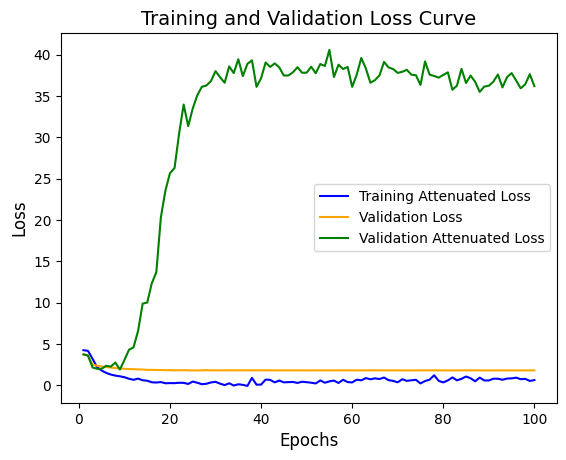

In [8]:
import matplotlib.pyplot as plt

# After training is finished, plot the loss curves
plt.plot(range(1, num_epochs+1), train_attenuated_losses, label='Training Attenuated Loss', color='blue')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss', color='orange')
plt.plot(range(1, num_epochs+1), val_attenuated_losses, label='Validation Attenuated Loss', color='green')
# Labeling x and y axes
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
# Adding title
plt.title('Training and Validation Loss Curve', fontsize=14)
# Adding legend
plt.legend()
# Show the plot
plt.show()